In [303]:
import numpy as np
import pandas as pd
df = pd.read_csv('../SMS_Spam_Classifier/spam.csv',encoding = 'latin-1')

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [305]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [306]:
df.rename(columns={'v1':'target' , 'v2':'input'},inplace=True)

In [307]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [308]:
df['target'] = encoder.fit_transform(df['target'])

In [309]:
df.isnull().sum()

target    0
input     0
dtype: int64

In [310]:
df.duplicated().sum()

403

In [311]:
df = df.drop_duplicates(keep='first')

EDA

In [312]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7ba97739d690>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')])

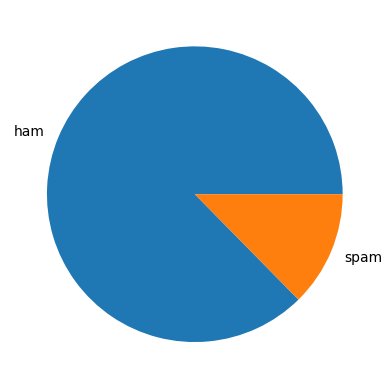

In [313]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'])


In [314]:
import nltk

In [315]:
df['char_cnt'] = df['input'].apply(len)

In [316]:
df['word_cnt'] = df['input'].apply(lambda x : len(nltk.word_tokenize(x)))

In [317]:
df['sent_cnt']=df['input'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [318]:
df[df['target']==0][['char_cnt','word_cnt','sent_cnt']].describe()

,char_cnt,word_cnt,sent_cnt
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [319]:
df[df['target']==1][['char_cnt','word_cnt','sent_cnt']].describe()

,char_cnt,word_cnt,sent_cnt
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [320]:
import seaborn as sns

<Axes: xlabel='char_cnt', ylabel='Count'>

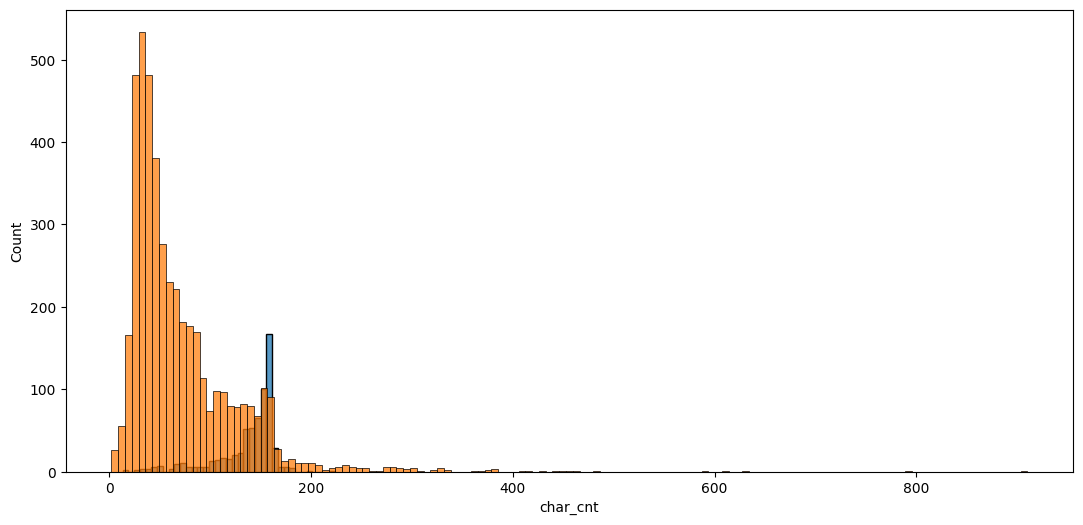

In [321]:
plt.figure(figsize=(13,6))
sns.histplot(df[df['target']==1]['char_cnt'],)
sns.histplot(df[df['target']==0]['char_cnt'])

<Axes: xlabel='word_cnt', ylabel='Count'>

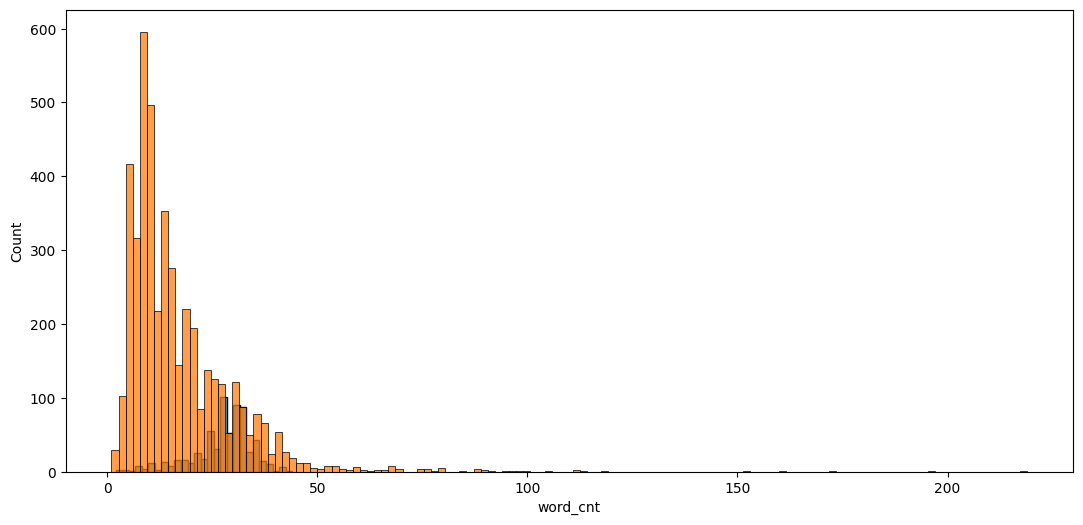

In [322]:
plt.figure(figsize=(13,6))
sns.histplot(df[df['target']==1]['word_cnt'],)
sns.histplot(df[df['target']==0]['word_cnt'])

<Axes: xlabel='sent_cnt', ylabel='Count'>

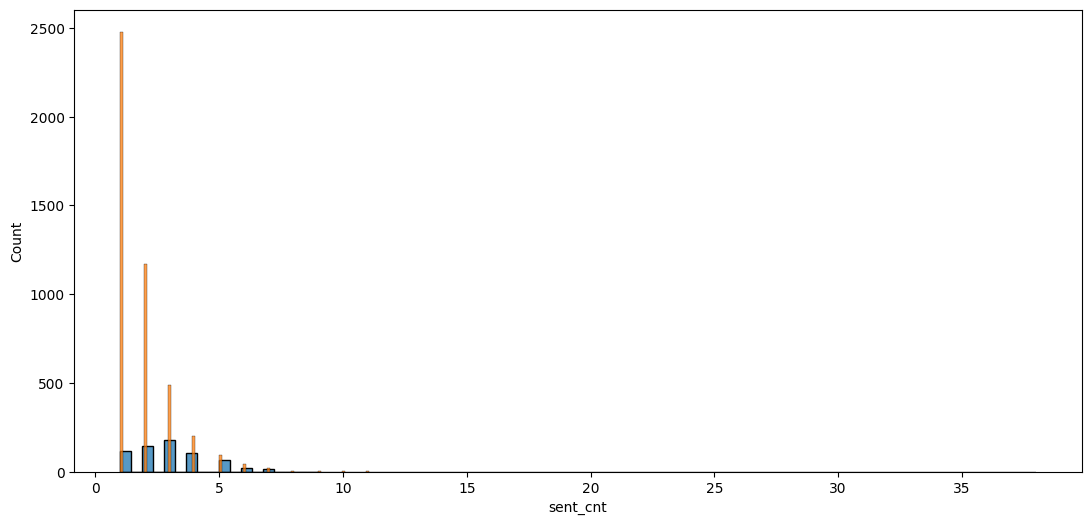

In [323]:
plt.figure(figsize=(13,6))
sns.histplot(df[df['target']==1]['sent_cnt'])
sns.histplot(df[df['target']==0]['sent_cnt'])

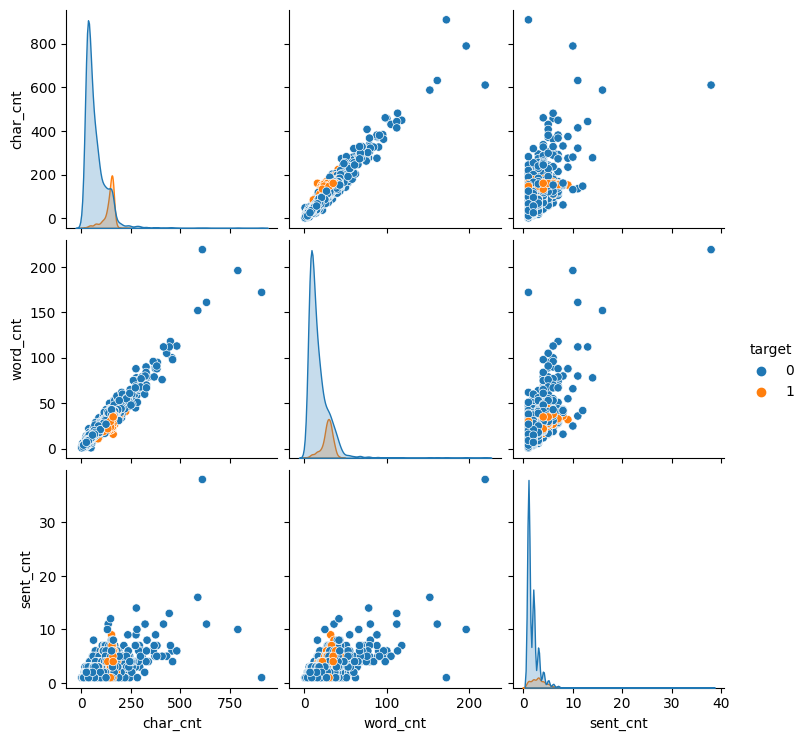

In [324]:
sns.pairplot(df,hue='target')

PRE-PROCESSING

In [325]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [326]:
df['transformed_ip']=df['input'].apply(text_transform)

In [327]:
df

,target,input,char_cnt,word_cnt,sent_cnt,transformed_ip
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [328]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500)

In [329]:
spam_wc = wc.generate(df[df['target']==1]['transformed_ip'].str.cat(sep=" "))

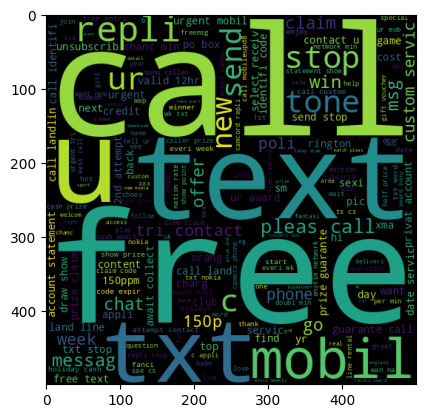

In [330]:
plt.imshow(spam_wc)

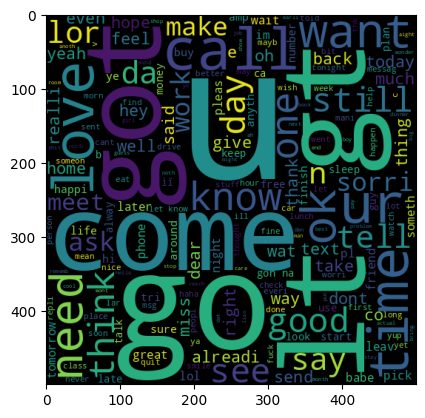

In [331]:
ham_wc = wc.generate(df[df['target']==0]['transformed_ip'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [332]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_ip'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

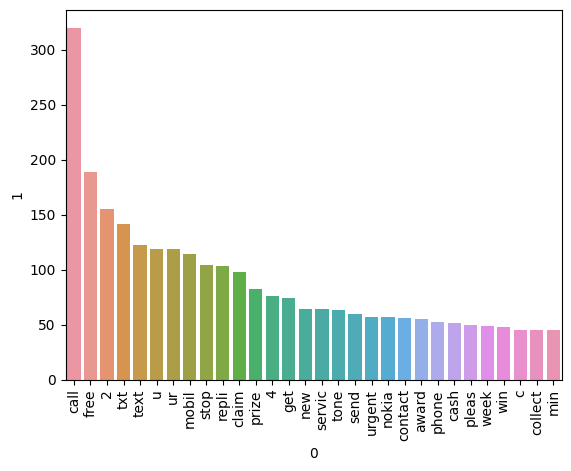

In [333]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

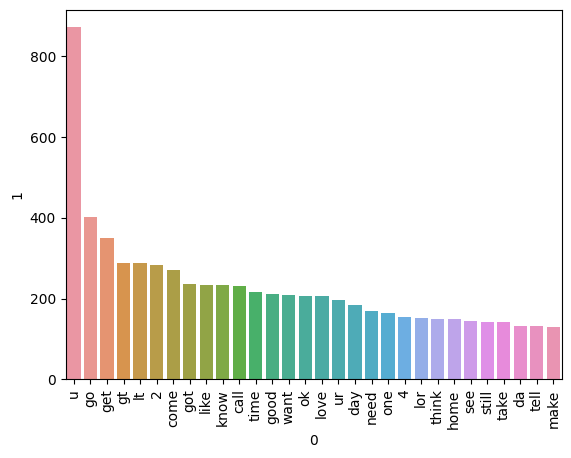

In [334]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_ip'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [335]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer   #convert text to numerical for naive bayes to implement
cv = TfidfVectorizer(max_features=3000)
X = cv.fit_transform(df['transformed_ip']).toarray()
y=df['target'].values

In [336]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [338]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [339]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [340]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [341]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8316831683168316
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8527131782945736
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597


In [342]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
10,xgb,0.964217,0.924370
7,BgC,0.954545,0.852713


In [343]:
# since MNB have higher accuracy and precision over others , we'll prefer it


DEPLOYMENT